Problem Statement A key challenge for property sellers is to determine the sale price of the property. Some are apparent and obvious, and some are not. Nevertheless, a rational approach aided by machine learning can be very useful in predicting the property price. A large data set with 79 different features (like living area, number of rooms, location, etc) along with their prices are provided for residential homes. The challenge is to learn a relationship between the important features and the price. Further, use it to predict the prices of a new set of houses.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import os
# os.getcwd()
# os.chdir("D:\Great Learning\DSE")
# os.getcwd()

In [3]:
train=pd.read_csv(r"C:\Users\VIKAS B S\OneDrive\Desktop\Great Learning\Projects\House Price Prediction Project\train.csv")
test=pd.read_csv(r"C:\Users\VIKAS B S\OneDrive\Desktop\Great Learning\Projects\House Price Prediction Project\test.csv")

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
df_price=pd.concat([train,test],ignore_index=True)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
df_price.drop('Id',axis=1,inplace=True)
df_price.shape

(2919, 80)

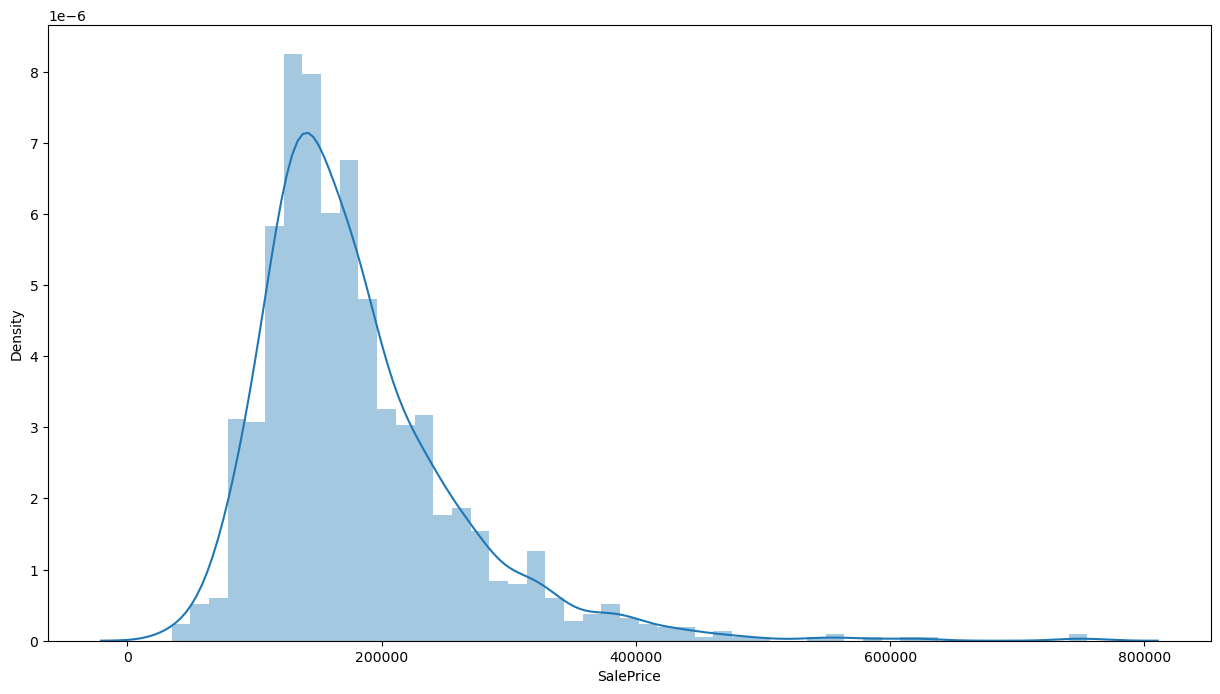

In [8]:
plt.figure(figsize=(15,8))
sns.distplot(df_price['SalePrice'])
plt.show()

Change the DataType

In [9]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [10]:
df_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [11]:
cols =['MSSubClass','OverallQual','OverallCond']

In [12]:
for i in cols:
  df_price[i]=df_price[i].astype('object')

### Check if there are any missing values

In [13]:
(df_price.isnull().sum()/df_price.index.size)*100

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

In [14]:
(df_price.isnull().sum()/(df_price.index.size)*100)[(df_price.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
GarageCars       0.034258
GarageArea       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
Electrical       0.034258
dtype: float64

### Missing Values
1. PoolQC, MiscFeature,Alley and Fence have high values of null.
2. Option is to drop these variables.
3. Instead of dropping, let us do some feature engineering

In [15]:
df_num=df_price.select_dtypes(include=np.number)
df_num= df_num.drop('SalePrice',axis=1)


df_cat =df_price.select_dtypes(exclude=np.number)

In [16]:
df_price.shape

(2919, 80)

### Missing Value Treatment

In [17]:
cols=list(df_num.columns)
cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Use KNN IMputer for imputing missing numerical values

In [18]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_num_sc= pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [20]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   float64
 2   YearBuilt      2919 non-null   float64
 3   YearRemodAdd   2919 non-null   float64
 4   MasVnrArea     2919 non-null   float64
 5   BsmtFinSF1     2919 non-null   float64
 6   BsmtFinSF2     2919 non-null   float64
 7   BsmtUnfSF      2919 non-null   float64
 8   TotalBsmtSF    2919 non-null   float64
 9   1stFlrSF       2919 non-null   float64
 10  2ndFlrSF       2919 non-null   float64
 11  LowQualFinSF   2919 non-null   float64
 12  GrLivArea      2919 non-null   float64
 13  BsmtFullBath   2919 non-null   float64
 14  BsmtHalfBath   2919 non-null   float64
 15  FullBath       2919 non-null   float64
 16  HalfBath       2919 non-null   float64
 17  BedroomAbvGr   2919 non-null   float64
 18  KitchenA

All Numeric Numbers are imputed

### Impute Categorical Variables

In [21]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
FireplaceQu     48.646797
GarageQual       5.447071
GarageFinish     5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MSZoning         0.137033
Functional       0.068517
Utilities        0.068517
Electrical       0.034258
KitchenQual      0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
dtype: float64

First 4 variables have to be dealt with differently

1. Where ever the data is available mark it as 1. Where ever, data is not available mark it as 0.

In [22]:
# df_cat['PoolQC_ava']=df_cat['PoolQC'].replace(np.nan,0).replace('Gd',1).replace('Ex',1).replace('Fa',1)

In [23]:
# df_cat['MiscFeature_ava']=df_cat['MiscFeature'].replace(np.nan,0).replace('Shed',1).replace('Gar2',1).replace('Othr',1).replace('TenC',1)

In [24]:
# df_cat['Alley_ava']=df_cat['Alley'].replace(np.nan,0).replace('Grvl',1).replace('Pave',1)

In [25]:
# df_cat['Fence_ava']=df_cat['Fence'].replace(np.nan,0).replace('MnPrv',1).replace('GdPrv',1).replace('GdWo',1).replace('MnWw',1)

In [26]:
# df_cat['FireplaceQu_ava']=df_cat['FireplaceQu'].replace(np.nan,0).replace('Gd',1).replace('TA',1).replace('Fa',1).replace('Ex',1).replace('Po',1)

In [27]:
# df_cat['MasVnrType_ava']= df_cat['MasVnrType'].replace(np.nan,0).replace('BrkFace',1).replace('Stone',1).replace('BrkCmn',1)

All the highly missing values in the columns have been Feature Engineered

1. Drop the Columns which have Feature Engineered.
2. Drop the old columns and retain the new columns which have Feature Engineering

In [28]:
df_cat.drop(['PoolQC','Alley','Fence','FireplaceQu','MiscFeature','MasVnrType'],axis=1,inplace=True)

In [29]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   object
 1   MSZoning       2915 non-null   object
 2   Street         2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2917 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  OverallQual    2919 non-null   object
 14  OverallCond    2919 non-null   object
 15  RoofStyle      2919 non-null   object
 16  RoofMatl       2919 non-null   object
 17  Exterior1st    2918 non-null   object
 18  Exterior2nd    2918 non-null

In [30]:
# df_cat[['PoolQC_ava','Alley_ava','Fence_ava','FireplaceQu_ava','MiscFeature_ava','MasVnrType_ava']] = df_cat[['PoolQC_ava','Alley_ava','Fence_ava','FireplaceQu_ava','MiscFeature_ava','MasVnrType_ava']].astype(object)

In [31]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   object
 1   MSZoning       2915 non-null   object
 2   Street         2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2917 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  OverallQual    2919 non-null   object
 14  OverallCond    2919 non-null   object
 15  RoofStyle      2919 non-null   object
 16  RoofMatl       2919 non-null   object
 17  Exterior1st    2918 non-null   object
 18  Exterior2nd    2918 non-null

In [32]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

GarageCond      5.447071
GarageQual      5.447071
GarageFinish    5.447071
GarageType      5.378554
BsmtCond        2.809181
BsmtExposure    2.809181
BsmtQual        2.774923
BsmtFinType2    2.740665
BsmtFinType1    2.706406
MSZoning        0.137033
Functional      0.068517
Utilities       0.068517
KitchenQual     0.034258
Electrical      0.034258
Exterior2nd     0.034258
Exterior1st     0.034258
SaleType        0.034258
dtype: float64

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,
                        strategy = 'most_frequent')

# fit it on all non object

imputer= imputer.fit(df_cat.iloc[:,:])

In [34]:
df_cat_trans=imputer.transform(df_cat)

In [35]:
df_cat =pd.DataFrame(df_cat_trans,columns=df_cat.columns)

In [36]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   float64
 2   YearBuilt      2919 non-null   float64
 3   YearRemodAdd   2919 non-null   float64
 4   MasVnrArea     2919 non-null   float64
 5   BsmtFinSF1     2919 non-null   float64
 6   BsmtFinSF2     2919 non-null   float64
 7   BsmtUnfSF      2919 non-null   float64
 8   TotalBsmtSF    2919 non-null   float64
 9   1stFlrSF       2919 non-null   float64
 10  2ndFlrSF       2919 non-null   float64
 11  LowQualFinSF   2919 non-null   float64
 12  GrLivArea      2919 non-null   float64
 13  BsmtFullBath   2919 non-null   float64
 14  BsmtHalfBath   2919 non-null   float64
 15  FullBath       2919 non-null   float64
 16  HalfBath       2919 non-null   float64
 17  BedroomAbvGr   2919 non-null   float64
 18  KitchenA

### Scale the data

In [37]:
df_num_sc.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()

In [40]:
df_num_standarized = pd.DataFrame(sc.fit_transform(df_num_sc),columns=df_num_sc.columns)
df_num_standarized.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,0.348787,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,-0.059898,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962


In [41]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [42]:
import category_encoders as ce

Example to explain Category Encoding - CATBOOST Technique

In [43]:
import category_encoders as ce
import pandas as pd


sample_dt = pd.DataFrame({
                      'Salary': ["Low", "Moderate", "Moderate", "High", "Low",
                                 "Moderate", "Moderate", "Moderate", "Low", "Low",
                                 "Low", "High", "Low", "Moderate", "Moderate"

                                 ],

                       'CIBIL':  [250, 650, 680, 800, 275,
                                 680, 675, 680, 200, 275,
                                 300, 820, 300, 690, 720
                                 ],

                      'Premium': [6250, 2231, 23456, 15000, 5600,
                                   5600, 7000, 4560, 8900, 9000,
                                   7688, 5600, 4580, 8900, 7800
                                 ],
                          })

In [44]:
x_sample = sample_dt.drop('Premium', axis=1)
y_sample = sample_dt['Premium']

In [45]:
sample_encode = ce.cat_boost.CatBoostEncoder()
sample_encode.fit(x_sample,y_sample)

sample_output = sample_encode.transform(x_sample)
sample_output

,Salary,CIBIL
0,7166.047619,250
1,8461.416667,650
2,8461.416667,680
3,9581.444444,800
4,7166.047619,275
5,8461.416667,680
6,8461.416667,675
7,8461.416667,680
8,7166.047619,200
9,7166.047619,275


In [46]:
#### End of encoding example

High value of Target variable will inflate the encoding value of categorical variable. Hence, transformation of Target variable helps to reduce the skewness

In [47]:
def cat_boost(cat_input,target):

  catboost = ce.cat_boost.CatBoostEncoder()
  catboost.fit(cat_input,target)
  df_encode= round(catboost.transform(cat_input),2)

  return df_encode

In [48]:
df_cat.shape

(2919, 40)

In [49]:
df_cat.head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [50]:
df_priceDataset= pd.concat([df_num_standarized,df_cat],axis=1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,-0.088484,0.137197,0.980221,0.848965,0.332854,0.098133,-0.293098,-0.288671,-0.298944,-0.610718,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,-0.442649,-0.078385,-1.859351,-0.682812,-0.572740,-0.494618,-0.293098,-0.047439,-0.671142,-0.506205,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,0.619846,0.518903,0.947203,0.753229,1.383791,0.469151,-0.293098,-0.161228,0.211694,-0.037170,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [51]:
df_priceDataset.shape

(2919, 73)

In [52]:
print("Training Data", train.shape)
print("Testing Data", test.shape)

Training Data (1460, 81)
Testing Data (1459, 80)


In [53]:
df_train = df_priceDataset.iloc[0:train.shape[0],]
df_train.shape

(1460, 73)

In [54]:
df_train.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [55]:
df_target = np.log(train['SalePrice'])

In [56]:
df_target.shape

(1460,)

In [57]:
pd.concat([df_train,df_target],axis=1)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.247694
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.109011
2,-0.088484,0.137197,0.980221,0.848965,0.332854,0.098133,-0.293098,-0.288671,-0.298944,-0.610718,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.317167
3,-0.442649,-0.078385,-1.859351,-0.682812,-0.572740,-0.494618,-0.293098,-0.047439,-0.671142,-0.506205,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,11.849398
4,0.619846,0.518903,0.947203,0.753229,1.383791,0.469151,-0.293098,-0.161228,0.211694,-0.037170,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.354107,-0.285470,0.914184,0.753229,-0.572740,-0.968819,-0.293098,0.892456,-0.224050,-0.526598,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.072541
1456,0.664117,0.381311,0.220801,0.178812,0.092480,0.765527,0.670556,0.064074,1.112686,2.328397,...,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,12.254863
1457,-0.177025,-0.142806,-1.000876,1.040437,-0.572740,-0.365091,-0.293098,0.719497,0.227581,0.072441,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.493130
1458,-0.088484,-0.057207,-0.703711,0.561757,-0.572740,-0.861246,5.790336,-1.276357,0.059637,-0.207960,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,11.864462


In [58]:
df_train = pd.concat([df_train,df_target],axis=1)

In [59]:
df_train.shape

(1460, 74)

In [60]:
df_test = df_priceDataset.iloc[train.shape[0] :,]
df_test.shape

(1459, 73)

In [61]:
import os
os.getcwd()

'C:\\Users\\VIKAS B S\\Great Learning\\Projects\\House Price Prediction'

In [62]:
df_test.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1460,0.442764,0.184371,-0.340510,-1.113625,-0.572740,0.058616,0.558228,-0.661898,-0.385185,-0.671897,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1461,0.487035,0.519791,-0.439565,-1.257229,0.030989,1.057511,-0.293098,-0.352393,0.629282,0.431865,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   YearBuilt      1459 non-null   float64
 3   YearRemodAdd   1459 non-null   float64
 4   MasVnrArea     1459 non-null   float64
 5   BsmtFinSF1     1459 non-null   float64
 6   BsmtFinSF2     1459 non-null   float64
 7   BsmtUnfSF      1459 non-null   float64
 8   TotalBsmtSF    1459 non-null   float64
 9   1stFlrSF       1459 non-null   float64
 10  2ndFlrSF       1459 non-null   float64
 11  LowQualFinSF   1459 non-null   float64
 12  GrLivArea      1459 non-null   float64
 13  BsmtFullBath   1459 non-null   float64
 14  BsmtHalfBath   1459 non-null   float64
 15  FullBath       1459 non-null   float64
 16  HalfBath       1459 non-null   float64
 17  BedroomAbvGr   1459 non-null   float64
 18  Kitch

### Encoding for Training Data

In [65]:
df_num_train = df_train.select_dtypes(include=np.number)
df_num_train.shape

(1460, 34)

In [66]:
df_cat_train = df_train.select_dtypes(exclude=np.number)

In [67]:
df_cat_train.shape

(1460, 40)

In [68]:
catboost = ce.cat_boost.CatBoostEncoder()

df_cat_en_train= catboost.fit_transform(df_cat_train,df_target)


In [69]:
# df_cat_en = cat_boost(df_cat_train,df_target)

In [70]:
df_cat_en_train.head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
1,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.024051,12.135873,12.024051,12.024051,...,12.135873,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873


In [71]:
df_cat_en_train.shape

(1460, 40)

In [72]:
# df_cat_en.reset_index(drop=True, inplace=True)
# df_num_sc.reset_index(drop=True, inplace=True)

In [73]:
df_train= pd.concat([df_num_train,df_cat_en_train],axis=1)
df_train.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,12.135873,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873


In [74]:
df_train.shape

(1460, 74)

In [75]:
df_train.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSSubClass', 'MSZoning',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
    

1. priceDataset is the dataset which has data cleaned and categorical variable encoded

Lets Build Simple Linear Regression -Base Model

We have not considered any feature selection techniques

### Encoding for Testing Data

In [76]:
df_num_test = df_test.select_dtypes(include=np.number)
df_num_test.shape

(1459, 33)

In [77]:
df_cat_test = df_test.select_dtypes(exclude=np.number)

In [78]:
df_cat_test.shape

(1459, 40)

In [79]:
df_cat_en_test = catboost.transform(df_cat_test)


In [80]:
df_cat_en_test.shape

(1459, 40)

In [81]:
df_cat_en_test.head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1460,12.052734,11.765970,12.025521,11.936189,12.022695,12.024183,12.001921,12.020567,11.868735,11.820843,...,12.061412,11.810882,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505
1461,12.052734,12.085831,12.025521,12.163178,12.022695,12.024183,12.027433,12.020567,11.868735,12.042901,...,12.061412,12.221999,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505


In [82]:
df_test= pd.concat([df_num_test,df_cat_en_test],axis=1)
df_test.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1460,0.442764,0.184371,-0.340510,-1.113625,-0.572740,0.058616,0.558228,-0.661898,-0.385185,-0.671897,...,12.061412,11.810882,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505
1461,0.487035,0.519791,-0.439565,-1.257229,0.030989,1.057511,-0.293098,-0.352393,0.629282,0.431865,...,12.061412,12.221999,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


In [84]:
X=df_train.drop("SalePrice",axis=1)
y=df_train["SalePrice"]

In [85]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=0,test_size=0.30)

# Creating Linear Regression 

In [86]:
lr=LinearRegression()

model_lr=lr.fit(Xtrain,ytrain)
pred_train=model_lr.predict(Xtrain)
pred_test=model_lr.predict(Xtest)

In [87]:
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

print("R2 train : ",r2_train)
print("R2 test : ",r2_test)

# Model fit is being checked over here.

R2 train :  0.8997655284434553
R2 test :  0.8167732420547811


In [88]:
# Mean Squared Error
# print("MSE Train : ",mean_squared_error(xtrain,pred_train))
# print("MSE Test : ",mean_squared_error(xtest,pred_test))

print("RMSE Train :",np.sqrt(mean_squared_error(ytrain,pred_train)))
print("RMSE Test :",np.sqrt(mean_squared_error(ytest,pred_test)))

# Distance from errors are being given the RMSE by the Value like how far is the error from the zero error value (Actual-Predict)

RMSE Train : 0.12725549645923198
RMSE Test : 0.16825746435611513


In [89]:
df_test.shape

(1459, 73)

In [90]:
lr=LinearRegression()
y_pred=[]

In [91]:
model=lr.fit(Xtrain,ytrain)
y_pred.append(model.predict(df_test))

In [92]:
y_pred

[array([11.61784994, 11.99646195, 12.08251294, ..., 12.11292612,
        11.69278794, 12.27321072])]

In [93]:
y_linear=pd.DataFrame(y_pred).T
y_linear

,0
0,11.617850
1,11.996462
2,12.082513
3,12.158350
4,12.225858
...,...
1454,11.313996
1455,11.377272
1456,12.112926
1457,11.692788


In [94]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [95]:
model_prediction=pd.DataFrame({"Id":test.Id,"SalePrice":test.TotalBsmtSF})

In [96]:
model_prediction.to_csv("Basic.csv",index=False)

In [97]:
model_prediction.head()

,Id,SalePrice
0,1461,882.0
1,1462,1329.0
2,1463,928.0
3,1464,926.0
4,1465,1280.0


In [98]:
model_prediction.size

2918

In [99]:
model_prediction["SalePrice"]=np.exp(y_linear)

In [100]:
model_prediction.head()

,Id,SalePrice
0,1461,111062.672553
1,1462,162179.974781
2,1463,176753.774414
3,1464,190679.719129
4,1465,203996.549533


In [101]:
model_prediction.to_csv("LinearReg_V3.csv",index=False)

# Regularisation

In [102]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

In [103]:
ridge=Ridge()
lasso=Lasso()
enet=ElasticNet()

In [104]:
y_pred=[]

# Ridge_Regression

In [105]:
params=({'alpha':[0.1,0.5,0.6,0.9,0.01,0.02,0.001,0.002,0.003,0.3,1,2,3,4,5,10,15,20]})

In [106]:
grid_ridge=GridSearchCV(estimator=ridge,param_grid=params,scoring="r2",cv=5)

In [107]:
grid_ridge.fit(Xtrain,ytrain)

,estimator,Ridge()
,param_grid,"{'alpha': [0.1, 0.5, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.001


In [108]:
grid_ridge.best_params_

{'alpha': 0.001}

In [109]:
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [110]:
rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))

In [111]:
print("RMSE Train :",rmse_train)
print("RMSE Test :",rmse_test)

RMSE Train : 0.12725549645923198
RMSE Test : 0.16825746435611513


In [112]:
y_pred=[]
y_pred.append(grid_ridge.predict(df_test))

In [113]:
y_linear=pd.DataFrame(y_pred).T
model_prediction["SalePrice"]=np.exp(y_linear)
model_prediction.to_csv("LinearReg_ridge_V3.csv",index=False)

# Lasso Regression

In [114]:
y_pred=[]

In [115]:
params=({'alpha':[0.01, 0.02, 0.05, 0.001,0.005,0.009,0.002,0.003,0.004,0.005,0.007,0.008,1,2]})

In [116]:
grid_lasso=GridSearchCV(estimator=lasso,param_grid=params,scoring="r2",cv=5)

In [117]:
grid_lasso.fit(Xtrain,ytrain)

,estimator,Lasso()
,param_grid,"{'alpha': [0.01, 0.02, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.002


In [118]:
grid_lasso.best_params_

{'alpha': 0.002}

In [119]:
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [120]:
rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))

In [121]:
print("RMSE Train :",rmse_train)
print("RMSE Test :",rmse_test)

RMSE Train : 0.12725549645923198
RMSE Test : 0.16825746435611513


In [122]:
y_pred=[]
y_pred.append(grid_lasso.predict(df_test))

In [123]:
y_linear=pd.DataFrame(y_pred).T
model_prediction["SalePrice"]=np.exp(y_linear)
model_prediction.to_csv("LinearReg_lasso_V3.csv",index=False)

# ElasticNet Reg

In [124]:
y_pred=[]

In [125]:
params=({'l1_ratio':[0.1,0.01,0.001,0.2,0.3,0.5,0.7,0.8,0.9,0.25],
         'alpha'   :[0.1,0.2,0.9,1,2,3,4,5,6,7,8,9,10,12,15,20]
        })

In [126]:
grid_enet=GridSearchCV(estimator=enet,param_grid=params,scoring="r2",cv=5)

In [127]:
grid_enet.fit(Xtrain,ytrain)

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.1, 0.2, ...], 'l1_ratio': [0.1, 0.01, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [128]:
grid_enet.best_params_

{'alpha': 0.1, 'l1_ratio': 0.001}

In [129]:
rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))

In [130]:
print("RMSE Train :",rmse_train)
print("RMSE Test :",rmse_test)

RMSE Train : 0.12725549645923198
RMSE Test : 0.16825746435611513


In [131]:
y_pred.append(grid_enet.predict(df_test))

In [132]:
y_linear=pd.DataFrame(y_pred).T
model_prediction["SalePrice"]=np.exp(y_linear)
model_prediction.to_csv("LinearReg_Enet_V3.csv",index=False)